In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#from scipy.stats import binom
from scipy.stats import weibull_min


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

In [467]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


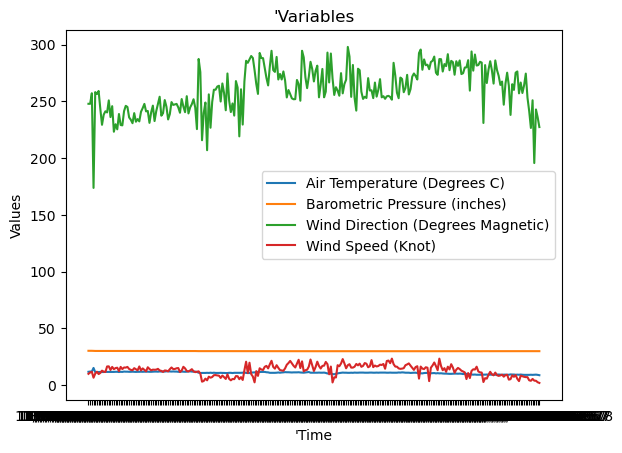

In [468]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

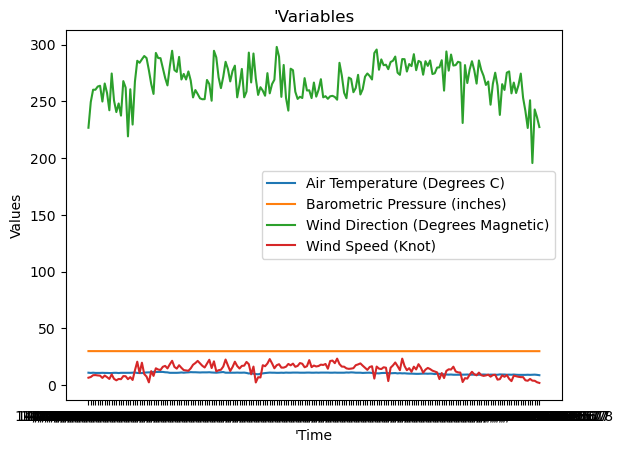

In [1299]:
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [1368]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
262    14/08/2015 23:36:17
263    14/08/2015 23:41:17
264    14/08/2015 23:46:17
265    14/08/2015 23:51:17
266    14/08/2015 23:56:18
Name: SensorTimestamp, Length: 267, dtype: object

In [1432]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: SensorTimestamp, Length: 267, dtype: datetime64[ns]

new variable datetime added

In [1640]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [1641]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: datetime, Length: 267, dtype: datetime64[ns]

In [1642]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


In [1643]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


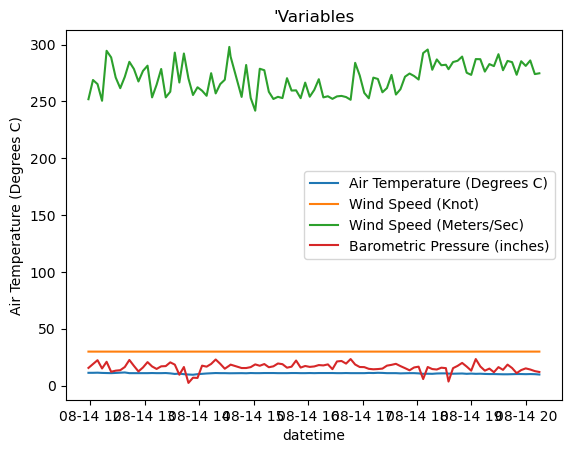

In [1644]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
#plt.xlabel("'Time")
#plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [1645]:
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


In [1646]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


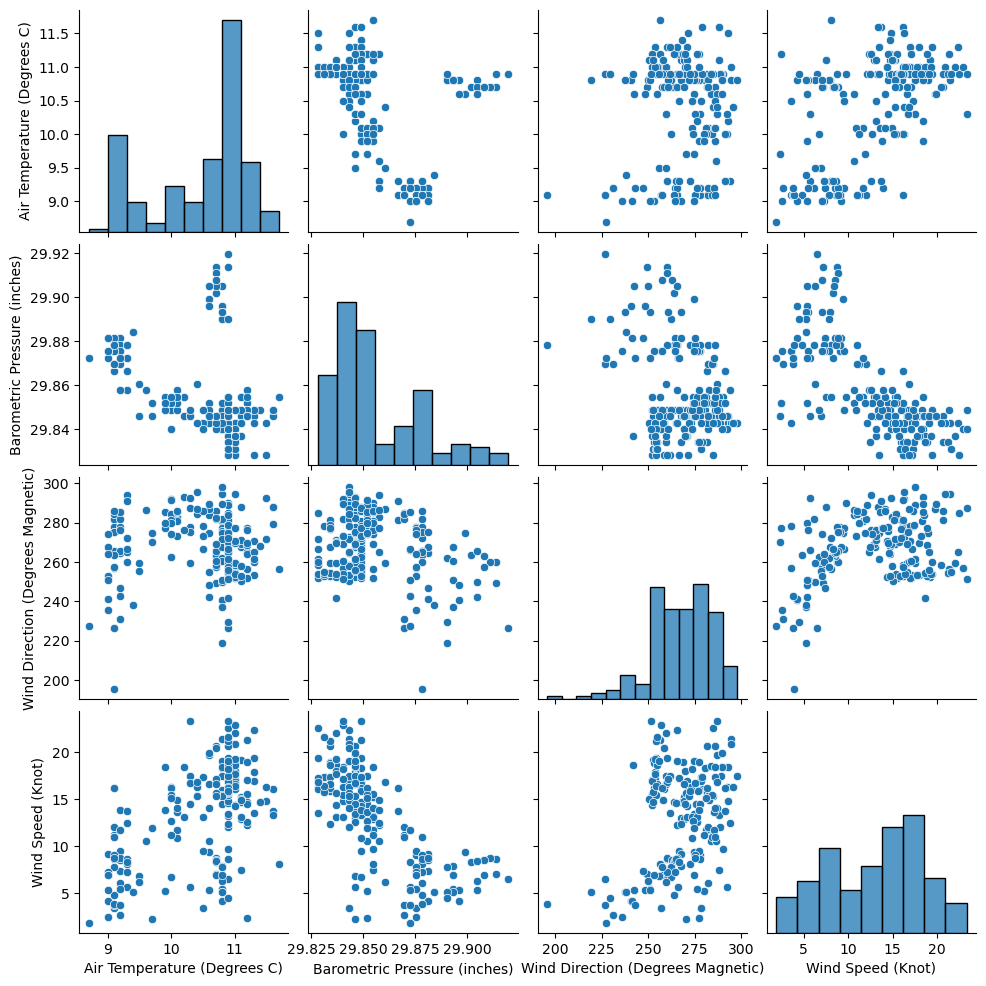

In [1647]:
sns.pairplot(df3)
plt.show()

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

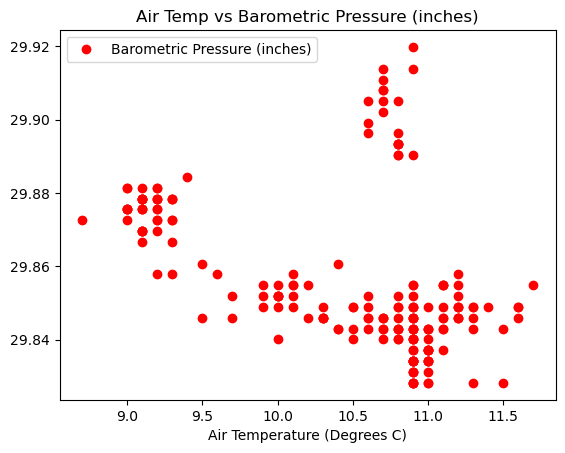

In [1648]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

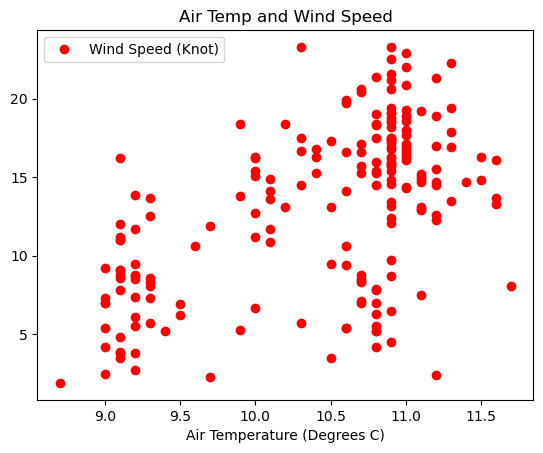

In [1649]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='ro', title="Air Temp and Wind Speed")

Displaying data types of each variable

In [1650]:
df3.dtypes

SensorTimestamp                              object
Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]
dtype: object

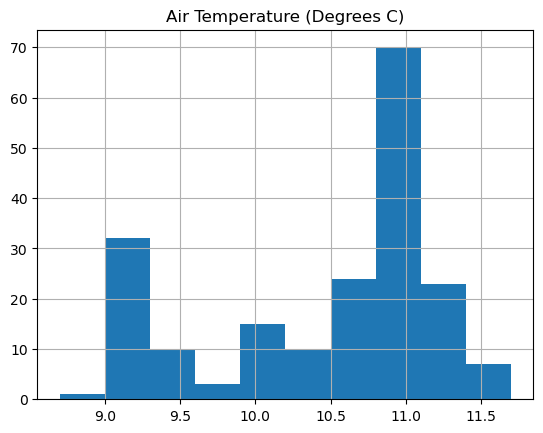

In [1651]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [1652]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=250, freq="MIN")
idx1

DatetimeIndex(['2023-11-08 00:00:33', '2023-11-08 00:01:33',
               '2023-11-08 00:02:33', '2023-11-08 00:03:33',
               '2023-11-08 00:04:33', '2023-11-08 00:05:33',
               '2023-11-08 00:06:33', '2023-11-08 00:07:33',
               '2023-11-08 00:08:33', '2023-11-08 00:09:33',
               ...
               '2023-11-08 04:00:33', '2023-11-08 04:01:33',
               '2023-11-08 04:02:33', '2023-11-08 04:03:33',
               '2023-11-08 04:04:33', '2023-11-08 04:05:33',
               '2023-11-08 04:06:33', '2023-11-08 04:07:33',
               '2023-11-08 04:08:33', '2023-11-08 04:09:33'],
              dtype='datetime64[ns]', length=250, freq='T')

In [1653]:
rng1 = np.random.default_rng()
mu1, sigma1 = 10.42, .76
ts1 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts1

,Synthesised Air Temperature (Degrees C)
2023-11-08 00:00:33,10.415163
2023-11-08 00:01:33,11.470057
2023-11-08 00:02:33,9.915201
2023-11-08 00:03:33,8.774913
2023-11-08 00:04:33,10.339499
...,...
2023-11-08 04:05:33,11.861065
2023-11-08 04:06:33,9.397931
2023-11-08 04:07:33,10.262876
2023-11-08 04:08:33,10.087214


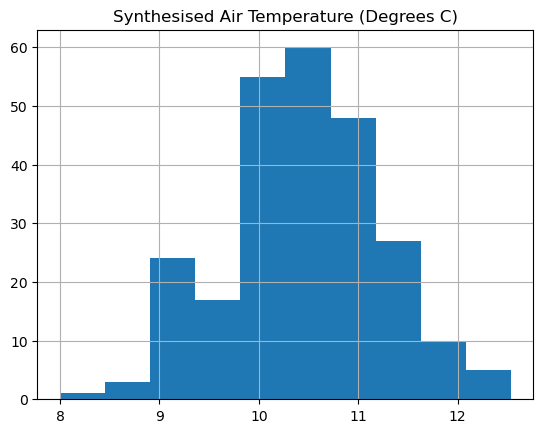

In [1654]:
ts1.hist('Synthesised Air Temperature (Degrees C)')
plt.show()

<AxesSubplot:xlabel='datetime', ylabel='Air Temperature (Degrees C)'>

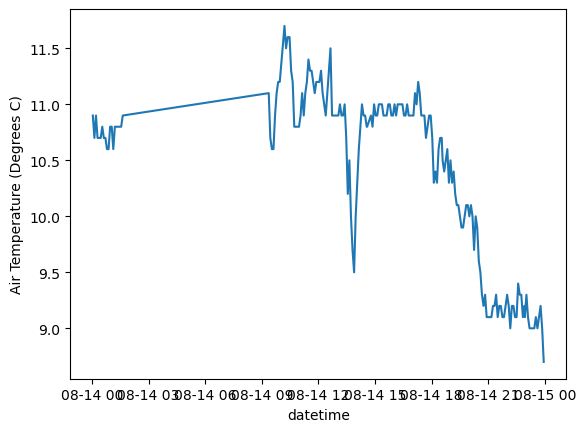

In [1655]:
sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

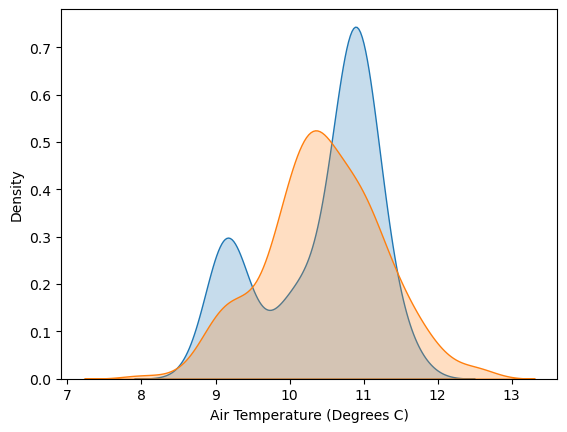

In [1656]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts1['Synthesised Air Temperature (Degrees C)'],shade=True)
#sns.kdeplot(x,shade=True)
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True)

In [1657]:
#sns.kdeplot(ts1['Synthesised Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:ylabel='Density'>

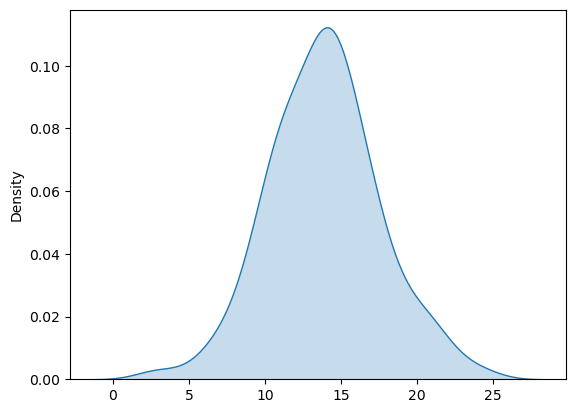

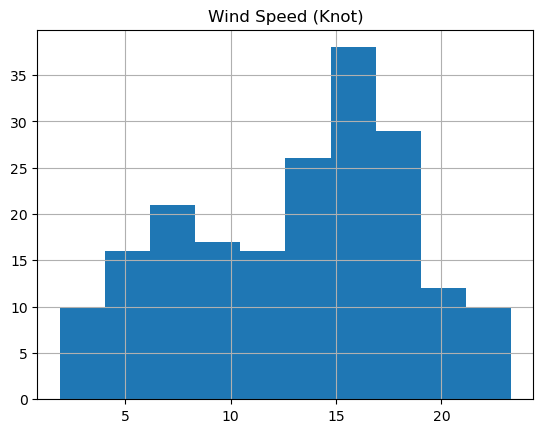

In [1659]:
df3.hist('Wind Speed (Knot)')
plt.show()

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

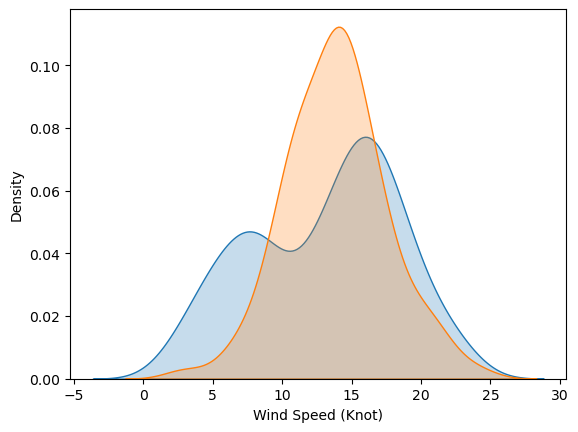

In [1660]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(x,shade=True)


In [1661]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
#idx2

In [1662]:
rng1 = np.random.default_rng()
mu1, sigma1 = 13.04, 5.29
ts2 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
ts2

,Synthesised Wind Speed (Knot)
2023-11-08 00:00:33,15.218669
2023-11-08 00:01:33,5.138430
2023-11-08 00:02:33,9.707100
2023-11-08 00:03:33,6.299027
2023-11-08 00:04:33,24.032730
...,...
2023-11-08 04:05:33,11.569448
2023-11-08 04:06:33,16.811590
2023-11-08 04:07:33,11.215235
2023-11-08 04:08:33,6.799113


In [1663]:
#rng1 = np.random.default_rng()
#shape = 5.0
#scale = 2.0
#values = weibull_min.rvs(2.1,8.5, size=100)
#ts2 = pd.DataFrame(data=rng1.weibull(15,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
#ts2

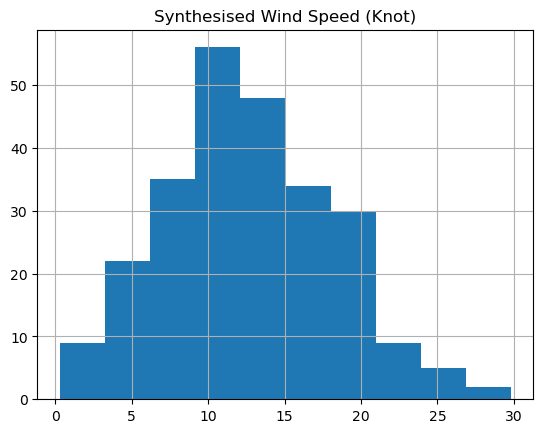

In [1664]:
ts2.hist()
plt.show()

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

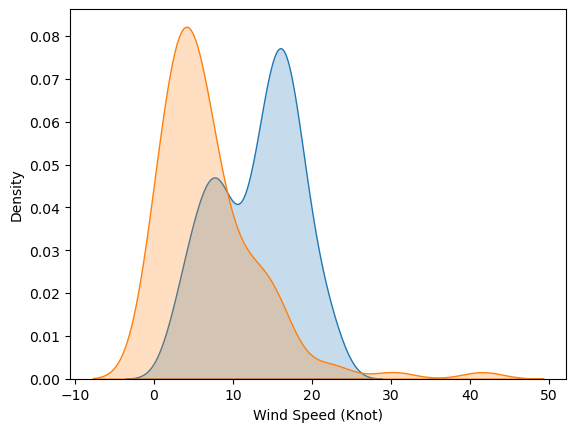

In [1665]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(df23['weibull1'],shade=True)

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

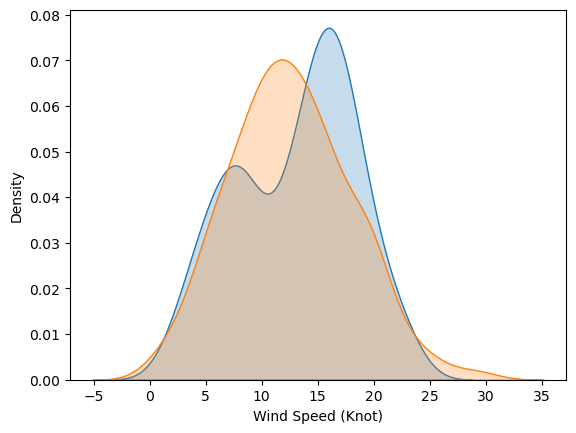

In [1666]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

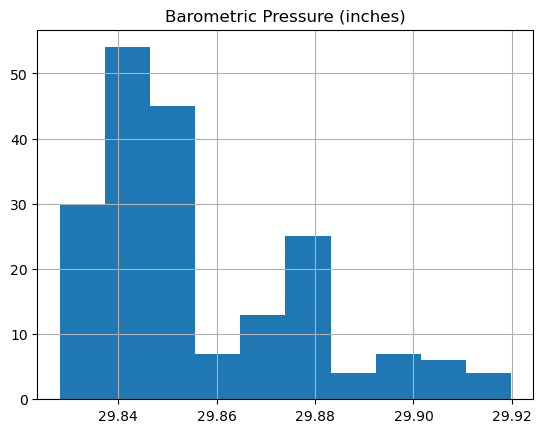

In [1667]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [1668]:
#sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

In [1669]:
rng1 = np.random.default_rng()
mu1, sigma1 = 29.85, 0.02
ts3 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.825665
2023-11-08 00:01:33,29.841758
2023-11-08 00:02:33,29.838539
2023-11-08 00:03:33,29.847851
2023-11-08 00:04:33,29.873896
...,...
2023-11-08 04:05:33,29.851497
2023-11-08 04:06:33,29.825525
2023-11-08 04:07:33,29.873988
2023-11-08 04:08:33,29.855911


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

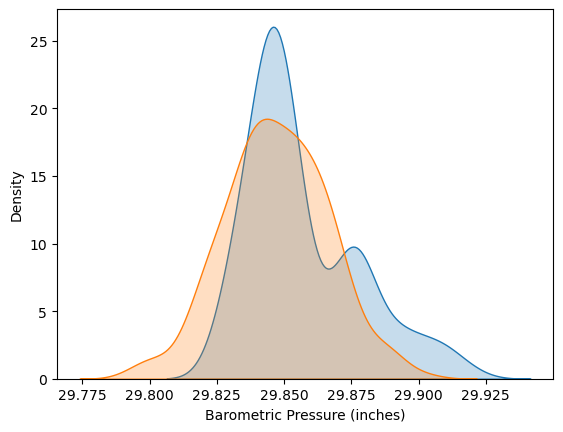

In [1670]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

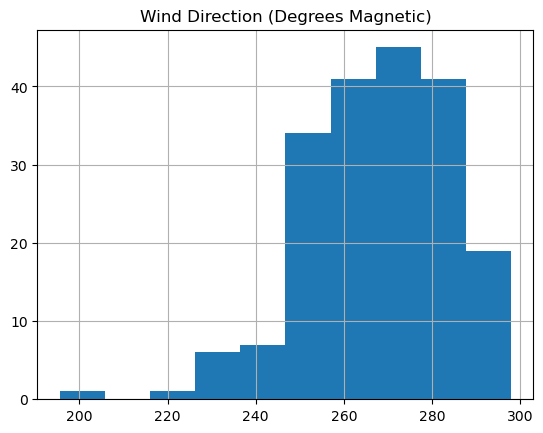

In [1671]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

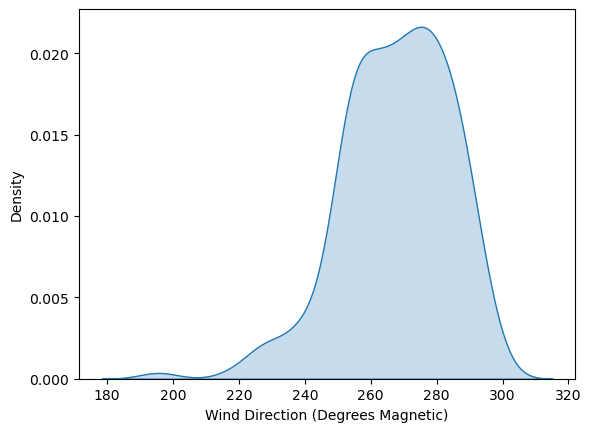

In [1672]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

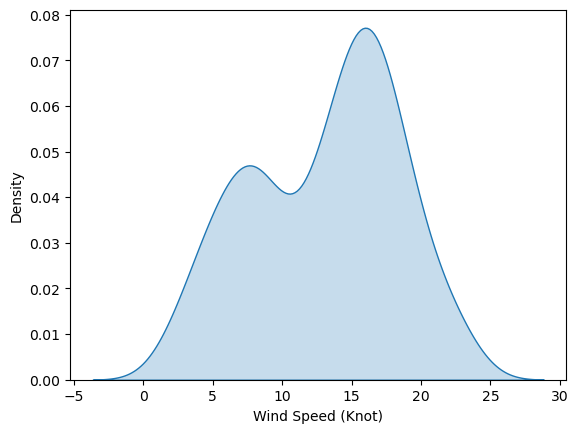

In [1673]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True, label="actual")
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

<AxesSubplot:xlabel='Synthesised Wind Speed (Knot)', ylabel='Density'>

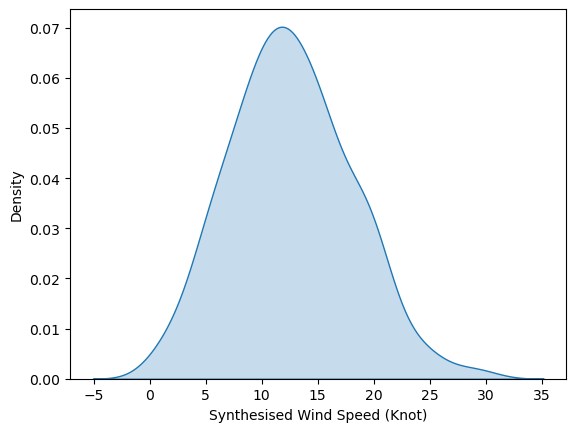

In [1674]:
sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [1675]:
result=pd.concat([ts1,ts2,ts3])
result

,Synthesised Air Temperature (Degrees C),Synthesised Wind Speed (Knot),Synthesised Barometric
2023-11-08 00:00:33,10.415163,NaN,NaN
2023-11-08 00:01:33,11.470057,NaN,NaN
2023-11-08 00:02:33,9.915201,NaN,NaN
2023-11-08 00:03:33,8.774913,NaN,NaN
2023-11-08 00:04:33,10.339499,NaN,NaN
...,...,...,...
2023-11-08 04:05:33,NaN,NaN,29.851497
2023-11-08 04:06:33,NaN,NaN,29.825525
2023-11-08 04:07:33,NaN,NaN,29.873988
2023-11-08 04:08:33,NaN,NaN,29.855911


In [1676]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

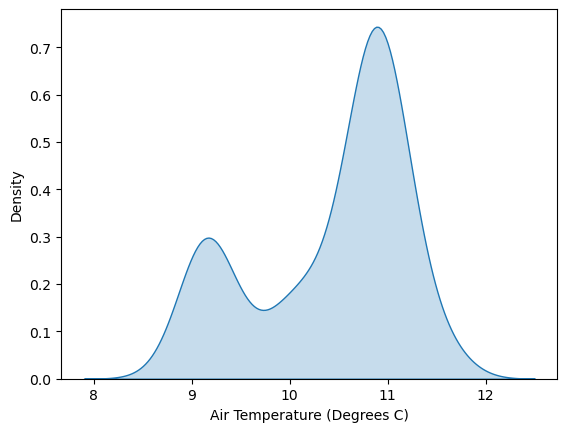

In [1677]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

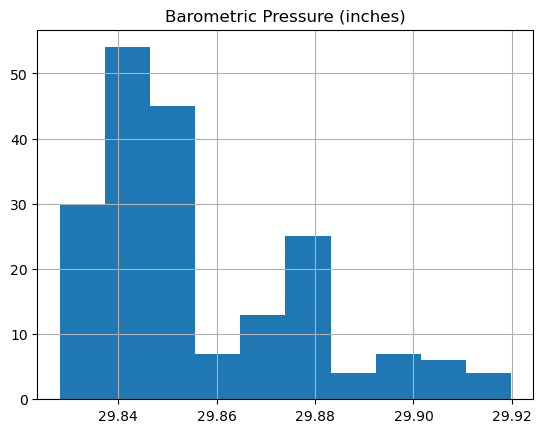

In [1678]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [1679]:
#idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
#idx1

In [1680]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
ts1

,Synthesised Air Temperature (Degrees C)
2023-11-08 00:00:33,10.415163
2023-11-08 00:01:33,11.470057
2023-11-08 00:02:33,9.915201
2023-11-08 00:03:33,8.774913
2023-11-08 00:04:33,10.339499
...,...
2023-11-08 04:05:33,11.861065
2023-11-08 04:06:33,9.397931
2023-11-08 04:07:33,10.262876
2023-11-08 04:08:33,10.087214


In [1681]:
#ts1.hist('Synthesises Weibull')
plt.show()

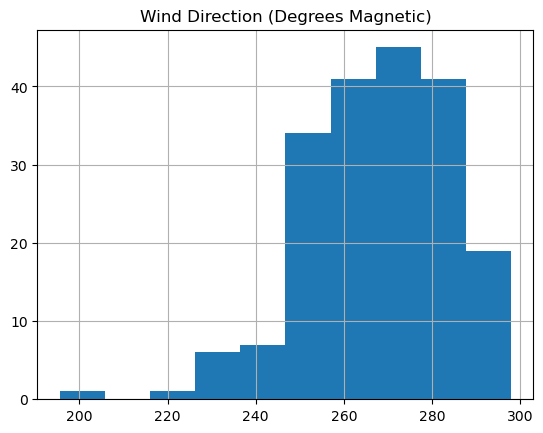

In [1682]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [1683]:
#sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [1684]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,254.004303
2023-11-08 00:01:33,266.475546
2023-11-08 00:02:33,279.473510
2023-11-08 00:03:33,255.901991
2023-11-08 00:04:33,262.687492
...,...
2023-11-08 04:05:33,231.042882
2023-11-08 04:06:33,279.189635
2023-11-08 04:07:33,285.514235
2023-11-08 04:08:33,260.639484


<AxesSubplot:xlabel='Synthesised Wind direction', ylabel='Density'>

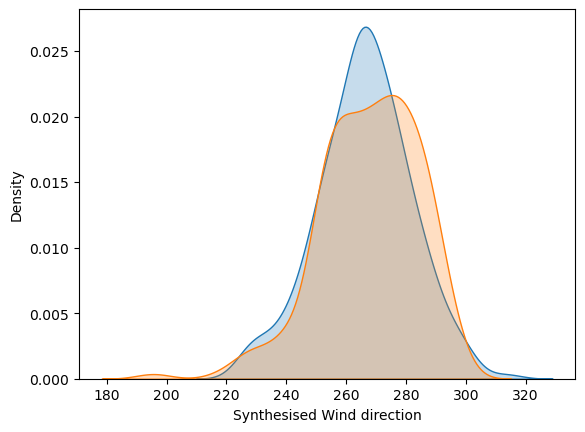

In [1685]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

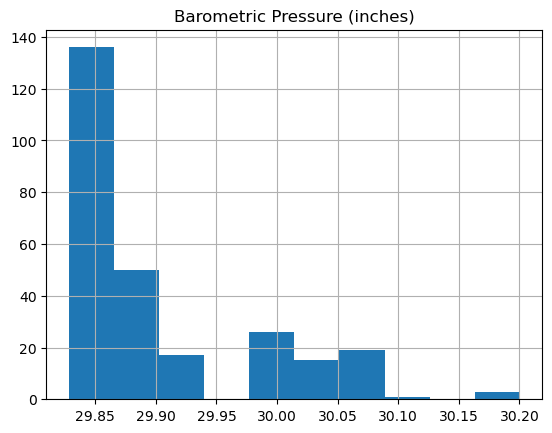

In [1686]:
df1.hist('Barometric Pressure (inches)')
plt.show()

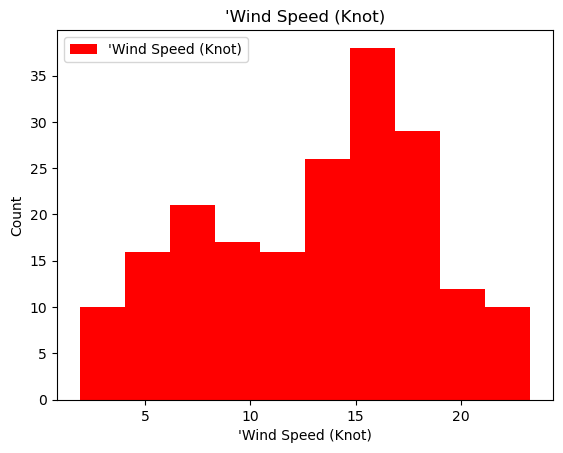

In [1687]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [1688]:
np.random.seed(420)

# Generate random dataset from the Weibull distribution
size = 10000
k = 20
lambda_ = 30
data = np.random.weibull(k, size) * lambda_
data

array([28.58046181, 29.25163681, 28.29634261, ..., 27.2216022 ,
       30.8828393 , 29.67975367])

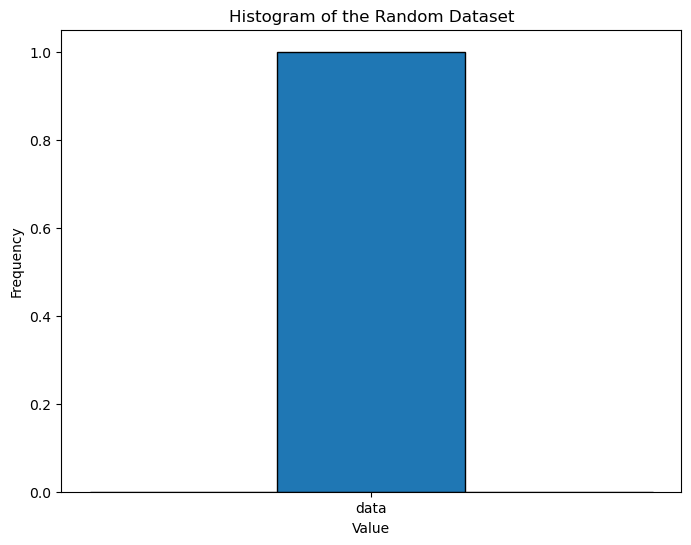

In [1689]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [1690]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [1691]:
rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

In [1692]:
ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded']), 
#ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded1'])
#ts1 = pd.DataFrame(data=rng.binomial(p = .75,len(idx)),index =idx, columns=['Incidents recorded1'])

In [1693]:
ts


(            Incidents recorded
 2018-12-31                  28
 2019-12-31                  22
 2020-12-31                  27
 2021-12-31                  26
 2022-12-31                  28
 ...                        ...
 2113-12-31                  32
 2114-12-31                  24
 2115-12-31                  22
 2116-12-31                  25
 2117-12-31                  22
 
 [100 rows x 1 columns],)

2.173305848478857 0 26.041286927456817


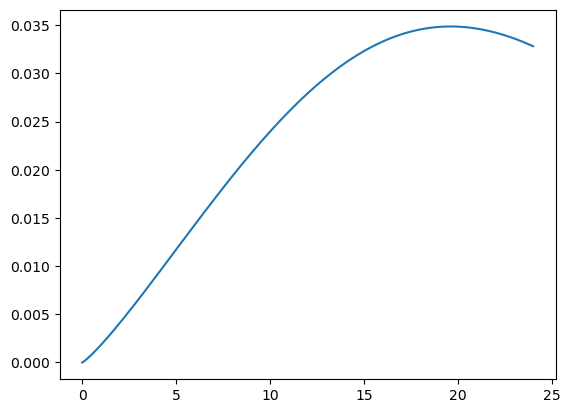

In [1694]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

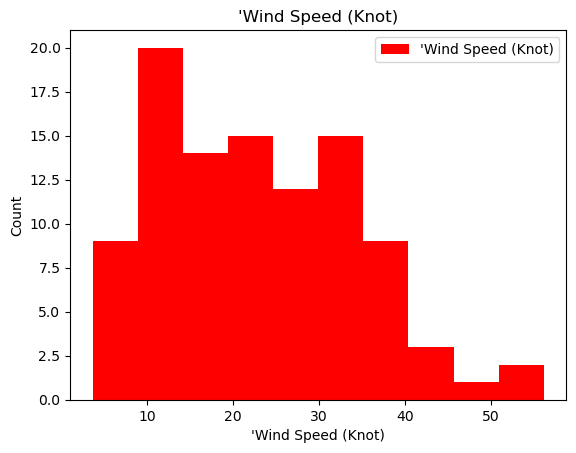

In [1695]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [1696]:
idx4 = pd.date_range(start = "2023-11-08 14:54:33", periods=250, freq="MIN")
idx4
mu1, sigma1 = 10.55, .67
rng4 = np.random.default_rng()
ts4 = pd.DataFrame(data=rng1.poisson(10.55,len(idx1)),index =idx4, columns=['Synthesisd )'])
ts4



,Synthesisd )
2023-11-08 14:54:33,9
2023-11-08 14:55:33,10
2023-11-08 14:56:33,11
2023-11-08 14:57:33,9
2023-11-08 14:58:33,9
...,...
2023-11-08 18:59:33,11
2023-11-08 19:00:33,13
2023-11-08 19:01:33,11
2023-11-08 19:02:33,10


In [ ]:
import numpy as np

x = np.random.poisson(lam=13.5, size=100)

sns.kdeplot(x,shade=True)

<AxesSubplot:xlabel='Synthesisd )', ylabel='Density'>

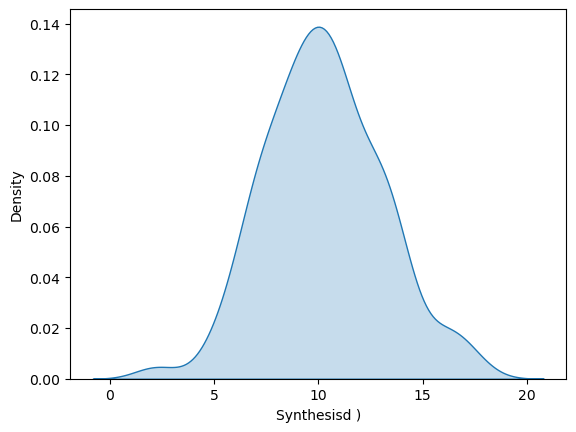

In [1697]:
sns.kdeplot(ts4['Synthesisd )'], shade=True, label="simulated")

In [1698]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Normal distribution variables
mu1, sigma1 = 10.55, .67
mu2, sigma2 = 0, 1
normal1 = np.random.normal(mu1, sigma1, 180)
normal2 = np.random.normal(mu2, sigma2, 180)

# Weibull distribution variables
a1, b1 = 2.1, 8.5
a2, b2 = 5, 2
weibull1 = np.random.weibull(a1, 180) * b1
weibull2 = np.random.weibull(a2, 180) * b2

# Create dataframe
df23 = pd.DataFrame({
    'normal1': normal1,
    'normal2': normal2,
    'weibull1': weibull1,
    'weibull2': weibull2
})

In [1699]:
#data1


In [1700]:
# Plot dataframe
#sns.kdeplot(df['normal1'], shade=True, label="simulated")
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#df.plot(kind='scatter', x='normal1', y='normal2', color='red')
#plt.legend
#plt.show()
#sns.kdeplot(df23['weibull1'], shade=True, label="simulated")
#plt.title('wiebull')
##plt.show()
#df.plot(kind='bar', x='weibull1', y='weibull2', color='green')
#plt.title('Bar Plot')
#plt.show()

#df.plot(kind='line', x='normal1', y='weibull1', color='blue')
#plt.title('Line Plot')
#plt.show()

In [1701]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


In [1702]:
df4 = df3.drop(['SensorTimestamp'],axis =1)
df4

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...
262,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


In [1703]:
import scipy.stats as stats
import numpy as np

# Load the data from the CSV file
dat = np.loadtxt('data.csv')
#data = dat.drop(['SensorTimestamp','Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)",'Air Temperature (Degrees C)','Barometric Pressure (inches)','Wind Direction (Degrees Magnetic)'],axis =1)
dat

array([ 6.5,  7.1,  8.7,  8.8,  8.5,  8.3,  6.3,  8.4,  7. ,  5.4,  9.4,
        5.5,  4.2,  5.4,  5.2,  7.9,  7.8,  5.2,  7. ,  4.5, 13. , 20.6,
       10.6, 19.7,  9.7,  7.5,  2.4, 12.3,  8.1, 14.8, 13.7, 13.3, 16.1,
       16.9, 14.7, 18.3, 21.4, 16. , 14.5, 17.5, 15.2, 13.2, 12.9, 12.6,
       14.7, 17.9, 19.4, 21.3, 19.2, 17. , 15.5, 18.9, 22.3, 15. , 20.9,
       12.1, 13.1, 13.5, 16.3, 22.5, 17.3, 12.4, 15.9, 20.6, 16.8, 14.6,
       16.9, 17.1, 20.4, 18.4,  9.5, 16.3,  2.3,  6.9,  6.7, 17.5, 16.6,
       19. , 22.9, 19.1, 14.8, 17.5, 18.4, 15.4, 15.4, 16.2, 18.6, 17.4,
       18.9, 16.1, 16.9, 19.4, 18.8, 15.7, 16.6, 22. , 15.8, 17.2, 16.4,
       16.8, 18. , 17.7, 18.6, 14.4, 21.2, 21.6, 19.3, 23.3, 18.5, 16.3,
       16.2, 14.7, 14.3, 14.5, 14.9, 17.5, 18.2, 19.1, 17.1, 15.3, 13.4,
       15.9, 16.6,  5.7, 16.3, 14.5, 14.1, 15.7, 15.3,  3.5, 15.3, 17.3,
       19.9, 16.7, 13.1, 23.3, 16.8, 13.1, 14.9, 11.7, 16.2, 13.8, 18.4,
       15.4, 10.9, 13.6, 15.1, 14.1, 12.7, 11.9, 11

In [1704]:
params = stats.weibull_min.fit(dat)
shape= params

# Print the shape and scale parameters
print("Shape parameter (k):", shape)
#print("Scale parameter (lambda):", scale)

Shape parameter (k): (4.769589841389784, -8.387807783415077, 23.469003373578794)


Rayleigh PDF 

In [1705]:
# Weibull distribution variables
a1, b1 = 1, 8

weibull1 = np.random.weibull(a1, 100) * b1


# Create dataframe
df23 = pd.DataFrame({
    'weibull1': weibull1,
    
})

In [1706]:

shape = stats.weibull_min.fit(dat)
shape

(4.769589841389784, -8.387807783415077, 23.469003373578794)